In [1]:
import tensorflow as tf
import os

In [2]:
data_dir='C:\\Users\\hp\\Downloads\\experiment'
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [3]:
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
import cv2
import imghdr

In [5]:
tf.config.list_physical_devices('GPU')

[]

In [8]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))

Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\1200px-Giant_Panda_2004-03-2.jpg
Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\1200px-Wildlife_at_Maasai_Mara_28Lion29.jpg
Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\96352420.jpg
Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\Fallow-deer.jpg
Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\Names-of-Animals-in-English.webp
Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\Omnivorous-animals-2-1.png
Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\p011wf95.jpg
Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\Pronghorn.jpg
Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\slide8_3.jpg.webp
Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\subordinate-meerkat-pack.jpg
Image not in ext list C:\Users\hp\Downloads\experiment\non_fish\vector.svg
Image not in ext list C:\Users\hp\Downloads\e

In [6]:
import numpy as np
from matplotlib import pyplot as plt

In [7]:
data = tf.keras.utils.image_dataset_from_directory(data_dir)

Found 1096 files belonging to 2 classes.


In [8]:
data_iterator = data.as_numpy_iterator()

In [9]:
batch = data_iterator.next()


In [10]:
batch[0][0]

array([[[183.58203   , 179.58203   , 167.58203   ],
        [187.41797   , 183.41797   , 171.41797   ],
        [188.5       , 184.5       , 172.5       ],
        ...,
        [226.        , 233.        , 239.        ],
        [226.        , 233.        , 239.        ],
        [225.        , 232.        , 238.        ]],

       [[183.00781   , 179.00781   , 168.00781   ],
        [188.2461    , 184.2461    , 173.2461    ],
        [189.50781   , 185.50781   , 174.50781   ],
        ...,
        [226.        , 233.        , 239.        ],
        [225.2461    , 232.2461    , 238.2461    ],
        [223.7461    , 230.7461    , 236.7461    ]],

       [[185.26953   , 181.26953   , 172.26953   ],
        [185.82031   , 181.82031   , 172.82031   ],
        [190.5       , 186.5       , 177.5       ],
        ...,
        [226.        , 233.        , 239.        ],
        [224.41016   , 231.41016   , 237.41016   ],
        [223.        , 230.        , 236.        ]],

       ...,

      

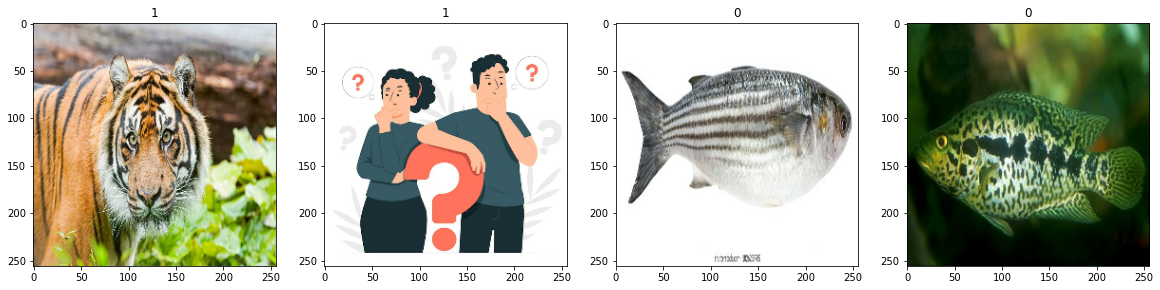

In [12]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
data.as_numpy_iterator().next()

(array([[[[0.77254903, 0.92156863, 0.9647059 ],
          [0.77254903, 0.92156863, 0.9647059 ],
          [0.77254903, 0.92156863, 0.9647059 ],
          ...,
          [0.7411765 , 0.90588236, 0.9607843 ],
          [0.7411765 , 0.90588236, 0.9607843 ],
          [0.73727024, 0.9019761 , 0.95687807]],
 
         [[0.77254903, 0.92156863, 0.9647059 ],
          [0.77254903, 0.92156863, 0.9647059 ],
          [0.77254903, 0.92156863, 0.9647059 ],
          ...,
          [0.7411765 , 0.90588236, 0.9607843 ],
          [0.7411765 , 0.90588236, 0.9607843 ],
          [0.73748386, 0.90218973, 0.9570917 ]],
 
         [[0.77254903, 0.92156863, 0.9647059 ],
          [0.77254903, 0.92156863, 0.9647059 ],
          [0.77254903, 0.92156863, 0.9647059 ],
          ...,
          [0.7411765 , 0.90588236, 0.9607843 ],
          [0.7411765 , 0.90588236, 0.9607843 ],
          [0.7411765 , 0.90588236, 0.9607843 ]],
 
         ...,
 
         [[0.73927695, 0.8950674 , 0.9529412 ],
          [0.73927

In [15]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [16]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [17]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [19]:
model = Sequential()

In [20]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [21]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [22]:
logdir='logs'

In [23]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [24]:
hist = model.fit(train, epochs=30, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/30
24/24 [==============================] - 99s 4s/step - loss: 0.8321 - accuracy: 0.5352 - val_loss: 0.6734 - val_accuracy: 0.6295
Epoch 2/30
24/24 [==============================] - 68s 3s/step - loss: 0.6467 - accuracy: 0.6549 - val_loss: 0.5779 - val_accuracy: 0.7589
Epoch 3/30
24/24 [==============================] - 74s 3s/step - loss: 0.5787 - accuracy: 0.6966 - val_loss: 0.4826 - val_accuracy: 0.7679
Epoch 4/30
24/24 [==============================] - 87s 4s/step - loss: 0.4575 - accuracy: 0.8034 - val_loss: 0.3955 - val_accuracy: 0.8348
Epoch 5/30
24/24 [==============================] - 96s 4s/step - loss: 0.3679 - accuracy: 0.8346 - val_loss: 0.3333 - val_accuracy: 0.8884
Epoch 6/30
24/24 [==============================] - 83s 3s/step - loss: 0.3061 - accuracy: 0.8789 - val_loss: 0.3181 - val_accuracy: 0.8750
Epoch 7/30
24/24 [==============================] - 78s 3s/step - loss: 0.2526 - accuracy: 0.9049 - val_loss: 0.3705 - val_accuracy: 0.8616
Epoch 8/30
24/24 [==

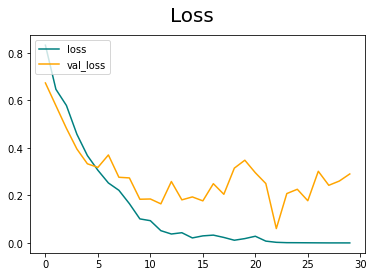

In [25]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

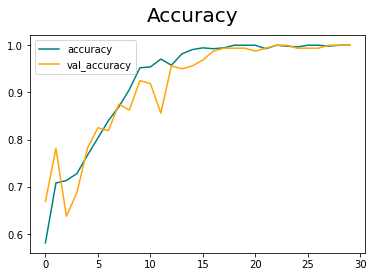

In [26]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [26]:
from tensorflow.keras.models import load_model

In [27]:
model.save(os.path.join('models','imageclassifier3.h5'))

In [28]:
import cv2

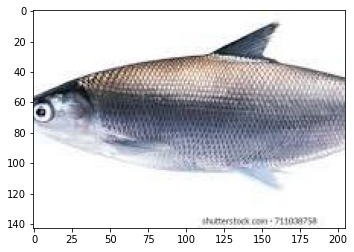

In [50]:
img = cv2.imread('fish2.jpeg')#('experiment\\non_fish\\stud.jpg')
plt.imshow(img)
plt.show()

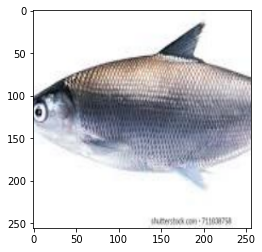

In [51]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 87ms/step


In [53]:
yhat

array([[1.495757e-05]], dtype=float32)

In [54]:
if yhat < 0.5: 
    print(f'Predicted class is fish')
else:
    print(f'Predicted class is not a fish')

Predicted class is fish
